In [4]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.option.
%matplotlib inline

In [66]:
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

In [5]:
fdr.__version__

'0.7.2'

# 1. 거래소별 상장 종목 리스트

  
* KRX:  KRX 종목 전체  
* KOSPI:	KOSPI 종목  
* KOSDAQ:	KOSDAQ 종목  
* KONEX:	KONEX 종목  
* NASDAQ:	나스닥 종목  
* NYSE:	뉴욕 증권거래소 종목  
* AMEX:	AMEX 종목  
* SP500:	S&P 500 종목  
* *KRX는 KOSPI,KOSDAQ,KONEX 모두 포함

In [24]:
def list_market(name):
    df_list = fdr.StockListing(name)
    return df_list

In [48]:
print(list_market("KRX").shape)
df_KRX = list_market("KRX")
df_KRX.head()

(2269, 4)


,Symbol,Name,Sector,Industry
0,001040,CJ,기타 금융업,지주회사
1,011150,CJ씨푸드,기타 식품 제조업,"수산물(어묵,맛살)가공품 도매,원양수산업,수출입"
2,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"
3,001390,KG케미칼,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제"
4,011070,LG이노텍,전자부품 제조업,기타 전자부품 제조업


In [61]:
df_KRX.loc[df_KRX['Name'].isin(["아시아나항공"])]

,Symbol,Name,Sector,Industry
1462,020560,아시아나항공,항공 여객 운송업,"항공운송(여객운송,화물운송)/항공기 제조,정비수리"


# 2. 종목별 가격 데이터_국내

### 단축 코드(6자리)를 사용  

* 코스피 종목: 068270(셀트리온), 005380(현대차) 등
* 코스닥 종목: 215600(신라젠), 151910(나노스) 등

In [35]:
def price_of_stock(num,start,end):
    df = fdr.DataReader(num, start, end)
    return df

In [36]:
price_of_stock('215600', '2018-01-01','2018-01-31')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,95900,104000,93300,102500,6824281,0.096257
2018-01-03,102600,104900,99500,103000,4760150,0.004878
2018-01-04,102600,104000,92200,92200,6538665,-0.104854
2018-01-05,85800,101200,85700,100000,8318372,0.084599
2018-01-08,98000,98400,92500,93800,6352776,-0.062000
2018-01-09,96500,119200,93800,109000,12734902,0.162047
2018-01-10,105000,107300,97800,98000,6588397,-0.100917
2018-01-11,97600,100600,95200,96700,4115386,-0.013265
2018-01-12,99800,103300,97100,98100,6806596,0.014478


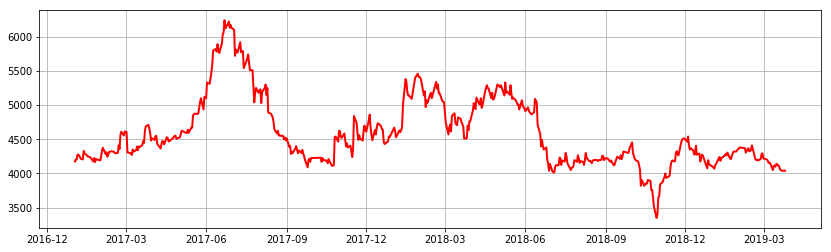

In [73]:
# 아시아나항공, 2017년~현재
df = fdr.DataReader('020560', '2017-01-01')
close = df['Close']
plt.plot(close, c='r')

plt.show()

# 2. 종목별 가격 데이터_미국

### 티커를 사용. 예를 들어, 'AAPL'(애플), 'AMZN'(아마존), 'GOOG'(구글)

In [74]:
# 애플(AAPL), 2018-01-01 ~ 2018-03-30
df = fdr.DataReader('AAPL', '2018-01-01', '2018-03-30')
df.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-03-23,164.94,168.39,169.92,164.94,41030000.0,-0.0232
2018-03-26,172.77,168.07,173.10,166.44,37540000.0,0.0475
2018-03-27,168.34,173.68,175.15,166.92,40920000.0,-0.0256
2018-03-28,166.48,167.25,170.02,165.19,41670000.0,-0.0110
2018-03-29,167.78,167.81,171.75,166.90,38400000.0,0.0078


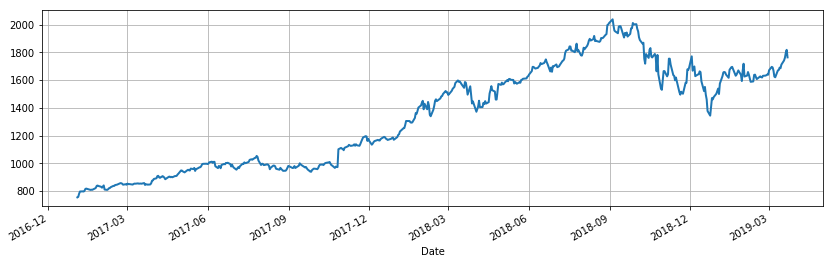

In [76]:
# 애플(AAPL), 2017년
df = fdr.DataReader('amzn', '2017')
df['Close'].plot()

# 3. 국가별 주요 지수
* KS11:	KOSPI 지수  
* KQ11:	KOSDAQ 지수  
* KS50:	KOSPI 50 지수  
* KS100:	KOSPI 100 지수  
* KS200:	KOSPI 200 지수  
* KRX100:	KRX 100  
* DJI:	다우존스 지수  
* IXIC:	나스닥 지수  
* US500:	S&P 500 지수  
* VIX:	S&P 500 VIX  
* JP225:	닛케이 225 선물  
* STOXX50:	유렵 STOXX 50  
* HSI:	항셍 (홍콩)  
* CSI300:	CSI 300 (중국)  
* SSEC:	상해 종합  
* UK100:	영국 FTSE  
* DE30:	독일 DAX 30  
* FCHI:	프랑스 CAC 40  

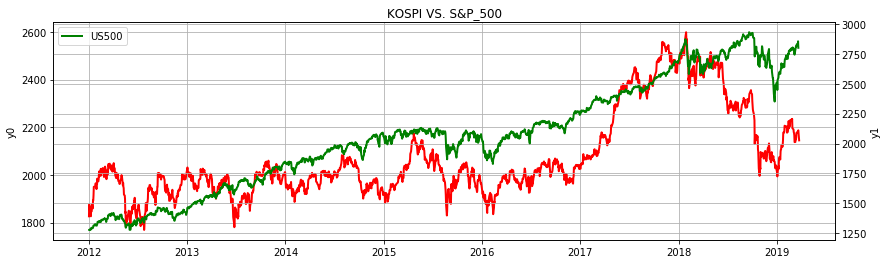

In [98]:
# KS11 (KOSPI 지수), 2015년~현재
df_KOSPI = fdr.DataReader('KS11', '2012')
df_US500 = fdr.DataReader('US500', '2012')
KOSPI  = df_KOSPI['Close']
US500 = df_US500['Close']

fig, ax0 = plt.subplots()
ax1 = ax0.twinx()

ax0.set_title("KOSPI VS. S&P_500")

ax0.plot(KOSPI, c='r', label="KS11")
ax0.set_ylabel("y0")

ax1.plot(US500, c='g', label="US500")
ax1.set_ylabel("y1")


plt.legend()
plt.show()

# 4. 환율
* USD/KRW:	달러당 원화 환율  
* USD/EUR:	달러당 유로화 환율  
* USD/JPY:	달러당 엔화 환율  
* CNY/KRW:	위엔화 원화 환율  
* EUR/USD:	유로화 달러 환율  
* USD/JPY:	달러 엔화 환율  
* JPY/KRW:	엔화 원화 환율  
* AUD/USD:	오스트레일리아 달러 환율   
* EUR/JPY:	유로화 엔화 환율  
* USD/RUB:	달러 루블화  

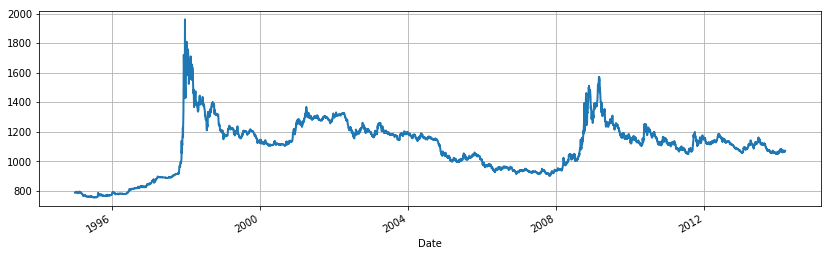

In [99]:
# 원달러 환율, 1995년~현재
df = fdr.DataReader('USD/KRW', '1995')
df['Close'].plot()

# 5. 상품선물

* NG:	천연가스 선물 (NYMEX)  
* GC:	금 선물 (COMEX)  
* SI:	은 선물 (COMEX)  
* HG:	구리 선물 (COMEX)  
* CL:	WTI유 선물 (NYMEX)  

In [100]:
# 천연가스 선물 (NYMEX)
df = fdr.DataReader('NG', '2018')
df.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-03-20,2.820,2.863,2.872,2.814,114170.0,-0.0188
2019-03-21,2.821,2.830,2.839,2.796,83790.0,0.0004
2019-03-22,2.753,2.821,2.824,2.721,92640.0,-0.0241
2019-03-24,2.732,2.737,2.737,2.726,0.0,-0.0076
2019-03-25,2.745,2.731,2.748,2.731,0.0,0.0048


# 6. 채권
* KR[년도]YT=RR' 형식으로 조합 (가능 년도=1,2,3,4,5,10,20,30,50)

* KR1YT=RR : 1년만기 한국 국채 수익률  
* KR3YT=RR:  1년만기 한국 국채 수익률  
* KR5YT=RR:	 5년만기 한국 국채 수익률  
* KR10YT=RR: 10년만기 한국 국채 수익률  

### 미국 

* 'US[개월]MT=RR' 형식으로 조합 (가능 개월=1,3,6)
* US[년도]YT=RR' 형식으로 조합 (가능 년도=1,2,3,4,5,7,10,30)

* US1MT=X:	1개월 미국 국채 수익률  
* US6MT=X:	6개월 미국 국채 수익률  
* US1YT=X:	1년만기 미국 국채 수익률  
* US5YT=X:	5년만기 미국 국채 수익률  
* US10YT=X:	10년만기 미국 국채 수익률  
* US30YT=X:	30년만기 미국 국채 수익률  

In [101]:
# 10년만기 미국채 수익률
df = fdr.DataReader('US10YT=X', '2018')
df.tail()

,Close,Open,High,Low,Change
Date,,,,,
2019-03-20,2.525,2.616,2.618,2.524,-0.0355
2019-03-21,2.539,2.524,2.546,2.500,0.0055
2019-03-22,2.437,2.539,2.539,2.418,-0.0402
2019-03-24,2.451,2.450,2.451,2.450,0.0059
2019-03-25,2.450,2.444,2.450,2.428,-0.0007


# 7. 암호화폐

### 한국: 빗썸(KRW)
* BTC/KRW	비트코인 원화 가격  
* ETH/KRW	이더리움 원화 가격  
* XRP/KRW	리플 원화 가격  
* BCH/KRW	비트코인 캐시 원화 가격  
* EOS/KRW	이오스 원화 가격  
* LTC/KRW	라이트 코인 원화 가격  
* XLM/KRW	스텔라 원화 가격  

### 미국: Bitfinex(USD)
* BTC/USD	비트코인 달러 가격  
* ETH/USD	이더리움 달러 가격  
* XRP/USD	리플 달러 가격  
* BCH/USD	비트코인 캐시 달러 가격  
* EOS/USD	이오스 달러 가격  
* LTC/USD	라이트 코인 달러 가격  
* XLM/USD	스텔라 달러 가격  

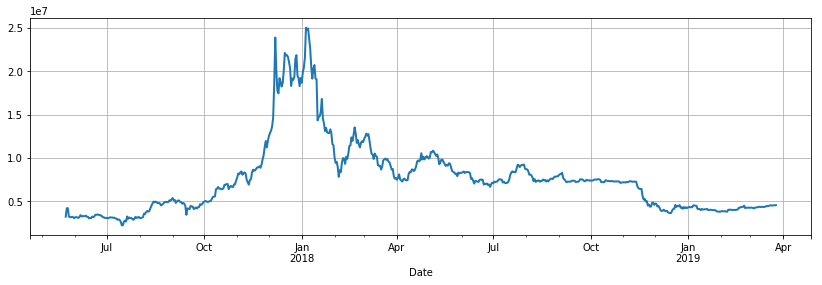

In [102]:
# 비트코인 원화 가격 (빗썸), 2016년~현재
df = fdr.DataReader('BTC/KRW', '2016')
df['Close'].plot()

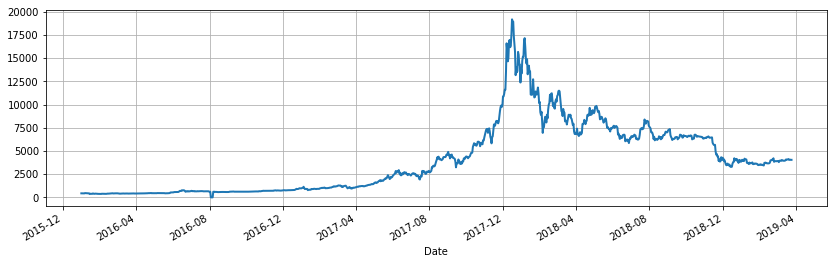

In [103]:
# 비트코인 USD 가격
df = fdr.DataReader('BTC/USD', '2016')
df['Close'].plot()